<a href="https://colab.research.google.com/github/likhit2804/Predicting-BigMart-Sales-Data-Using-ANN/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Data

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
train_df=pd.read_csv("/content/Train (1).csv")

train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Feature Engineering-1

In [3]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
train_df.duplicated().sum()

0

In [5]:
for i in train_df.columns[train_df.dtypes=="object"]:
  train_df[i]=train_df[i].astype("category")


In [6]:
train_df["Outlet_Size"].fillna(train_df["Outlet_Size"].mode()[0],inplace=True)




---


Filling null values with mode values as column type is categorical


---



In [7]:
grp=train_df.groupby("Item_Identifier")
grp.get_group("DRA12")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Medium,Tier 2,Supermarket Type1,2552.6772
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Medium,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
1693,DRA12,11.6,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.6,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Medium,Tier 3,Grocery Store,283.6308


In [8]:
grp.get_group("FDC44")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1094,FDC44,15.6,Low Fat,0.000000,Fruits and Vegetables,111.9518,OUT049,1999,Medium,Tier 1,Supermarket Type1,2163.1842
3708,FDC44,15.6,Low Fat,0.172453,Fruits and Vegetables,115.1518,OUT013,1987,High,Tier 3,Supermarket Type1,683.1108
4504,FDC44,NaN,Low Fat,0.171761,Fruits and Vegetables,115.7518,OUT027,1985,Medium,Tier 3,Supermarket Type3,5351.0346
5626,FDC44,15.6,Low Fat,0.172947,Fruits and Vegetables,114.1518,OUT045,2002,Medium,Tier 2,Supermarket Type1,1821.6288
6967,FDC44,15.6,Low Fat,0.173573,Fruits and Vegetables,114.4518,OUT017,2007,Medium,Tier 2,Supermarket Type1,2390.8878
7577,FDC44,15.6,Low Fat,0.172597,Fruits and Vegetables,114.8518,OUT046,1997,Small,Tier 1,Supermarket Type1,2163.1842




---


We can see that products with same Item_Identifier has same weight


---



In [9]:
def fill_missing_weight(df, grp):
  def g(group):

    return group.fillna(group.bfill())


  return df.groupby('Item_Identifier')['Item_Weight'].transform(g)

train_df["Item_Weight"] = fill_missing_weight(train_df.copy(), grp)

In [10]:
train_df.isnull().sum()

Item_Identifier                0
Item_Weight                  304
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64



---


The remaining null values are single items , we can just drop those values

---



In [11]:
train_df.dropna(inplace=True)
train_df.reset_index(drop=True, inplace=True)

In [12]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
for i in train_df.columns[train_df.dtypes=="category"]:
  print(train_df[i].unique())

['FDA15', 'DRC01', 'FDN15', 'FDX07', 'NCD19', ..., 'FDD28', 'FDU43', 'NCF55', 'NCW30', 'NCW05']
Length: 1555
Categories (1559, object): ['DRA12', 'DRA24', 'DRA59', 'DRB01', ..., 'NCZ41', 'NCZ42', 'NCZ53',
                            'NCZ54']
['Low Fat', 'Regular', 'low fat', 'LF', 'reg']
Categories (5, object): ['LF', 'Low Fat', 'Regular', 'low fat', 'reg']
['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', ..., 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']
Length: 16
Categories (16, object): ['Baking Goods', 'Breads', 'Breakfast', 'Canned', ..., 'Seafood', 'Snack Foods',
                          'Soft Drinks', 'Starchy Foods']
['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045', 'OUT017', 'OUT046', 'OUT035', 'OUT019']
Categories (10, object): ['OUT010', 'OUT013', 'OUT017', 'OUT018', ..., 'OUT035', 'OUT045', 'OUT046',
                          'OUT049']
['Medium', 'High', 'Small']
Categories (3, object): ['High', 'Medium', 'Small']
['Tier 1', 'T



---


We can see that LF and low fat are same as Low Fat and reg is same as Regular


---



In [14]:
replacements = {
    "LF": "Low Fat",
    "low fat": "Low Fat",
    "reg": "Regular"
}

train_df["Item_Fat_Content"].replace(replacements, inplace=True)

In [15]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8214,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8215,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8216,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8217,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## EDA Analysis

<Axes: xlabel='Item_Fat_Content'>

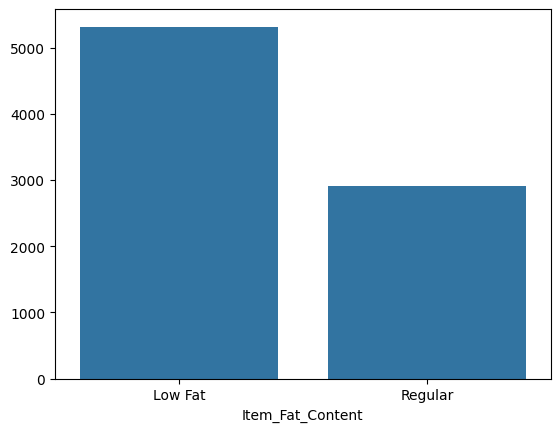

In [16]:
Item_Fat_Content_size=train_df.groupby("Item_Fat_Content").size()
sns.barplot(data=Item_Fat_Content_size)

<Axes: xlabel='Outlet_Location_Type'>

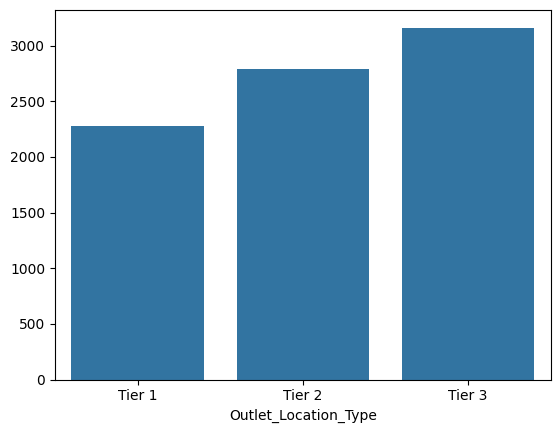

In [17]:

Outlet_Location_Type_size=train_df.groupby("Outlet_Location_Type").size()
sns.barplot(data=Outlet_Location_Type_size)

<Axes: xlabel='Outlet_Type'>

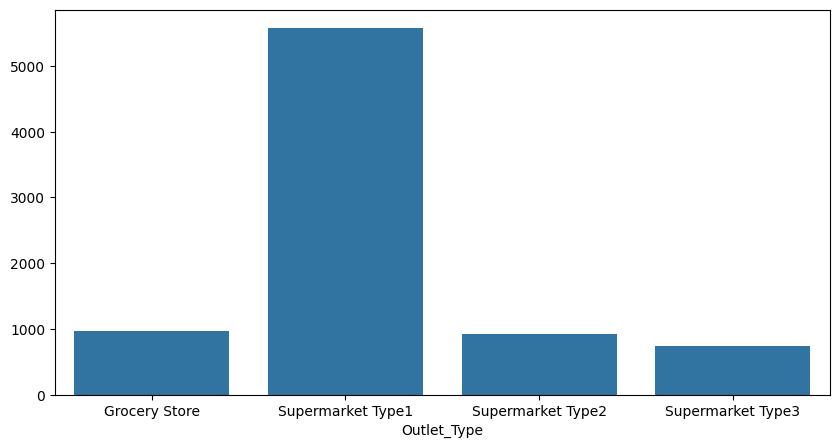

In [18]:
plt.figure(figsize=(10,5))
Outlet_Type_size=train_df.groupby("Outlet_Type").size()
sns.barplot(data=Outlet_Type_size)

<Axes: xlabel='Outlet_Size'>

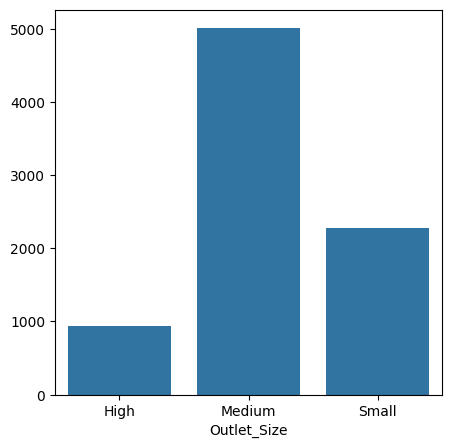

In [19]:
plt.figure(figsize=(5,5))
Outlet_Size_size=train_df.groupby("Outlet_Size").size()
sns.barplot(data=Outlet_Size_size)

<BarContainer object of 16 artists>

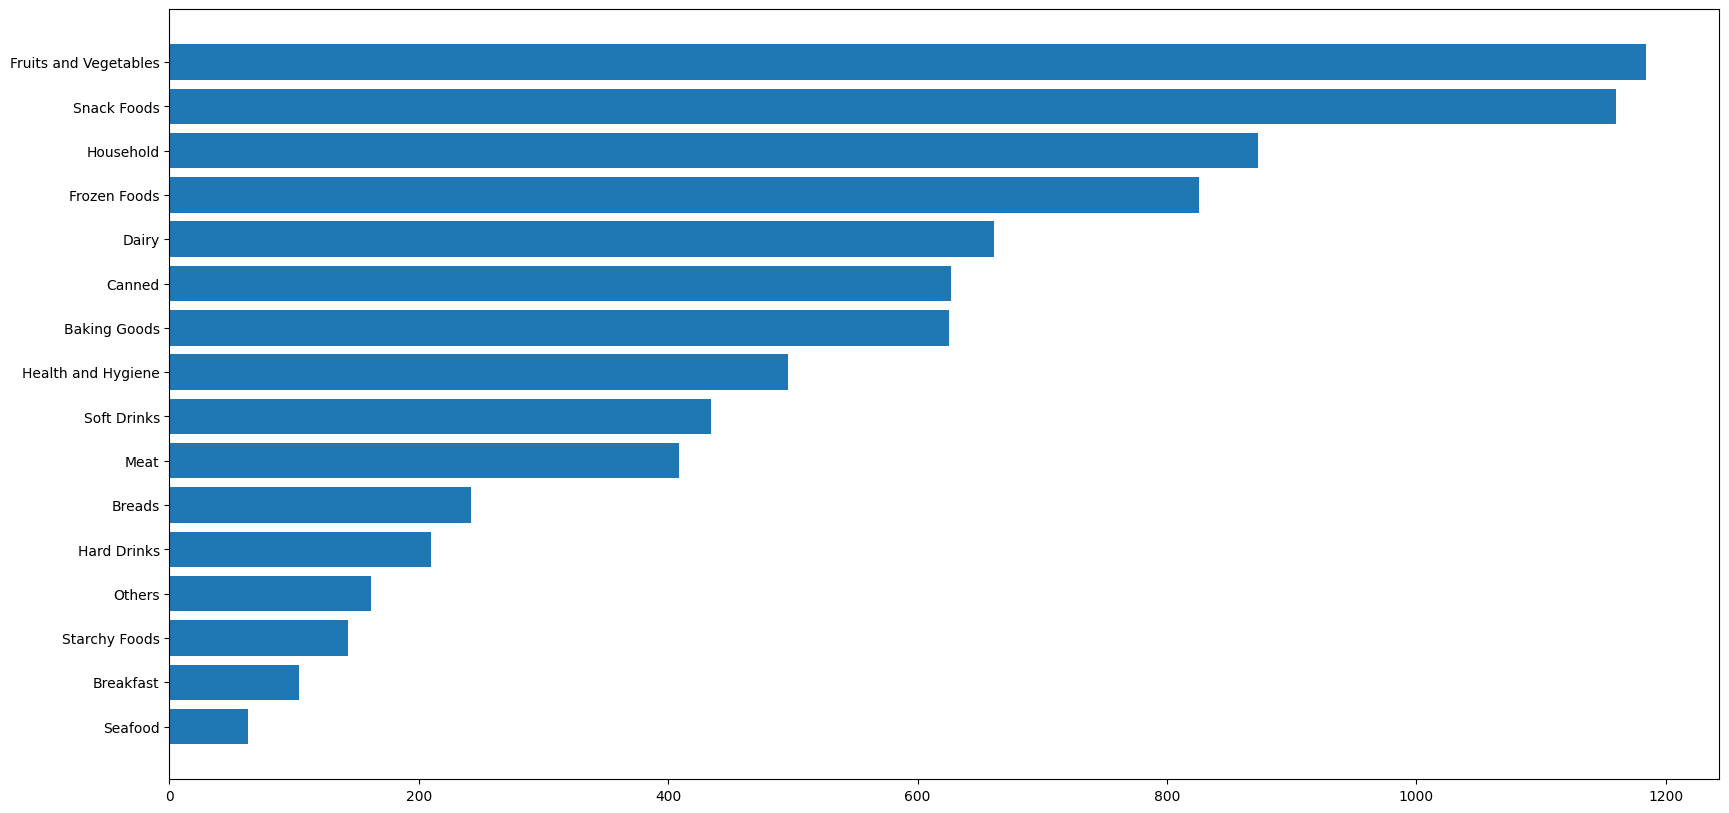

In [20]:
plt.figure(figsize=(20,10))

Item_Type_size=train_df.groupby("Item_Type").size().sort_values()
Item_Type_size
plt.barh(Item_Type_size.index,Item_Type_size.values)



---



---


**Here are the observations from the graphs:**
* People buy more low-fat items compared to Regular Fat items.
* The bar chart shows that the number of outlets increases as the tier level increases, with Tier 3 having the most outlets and Tier 1 having the least.
* There are very high sales from Supermarket Type 1.
* There are very high sales in medium-sized outlets.
* Fruits ,Vegetables, and Snacks are the most sold items.


---



---



<Axes: >

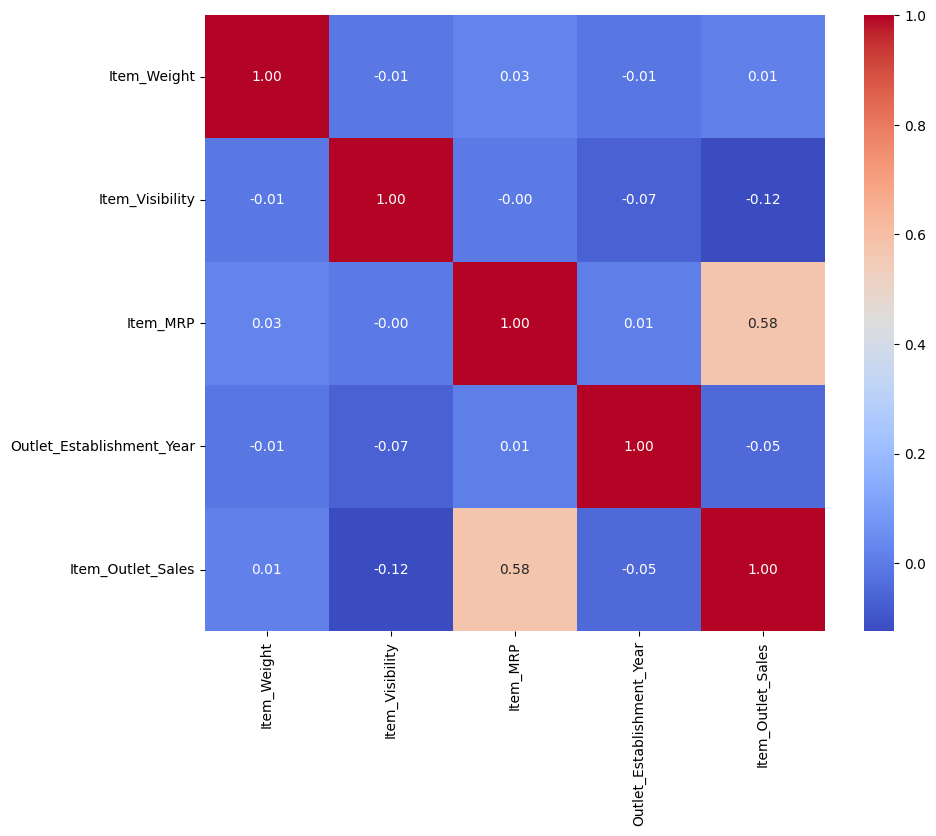

In [21]:
numerical_columns = train_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")



---



---


Item_MRP and Item_Outlet_Sales are highly correlated

---



---



In [22]:
train_df["Item_Visibility"][train_df["Item_Visibility"]==0].count()

511



---



---
There are 511 items with no Visibility.


---



---



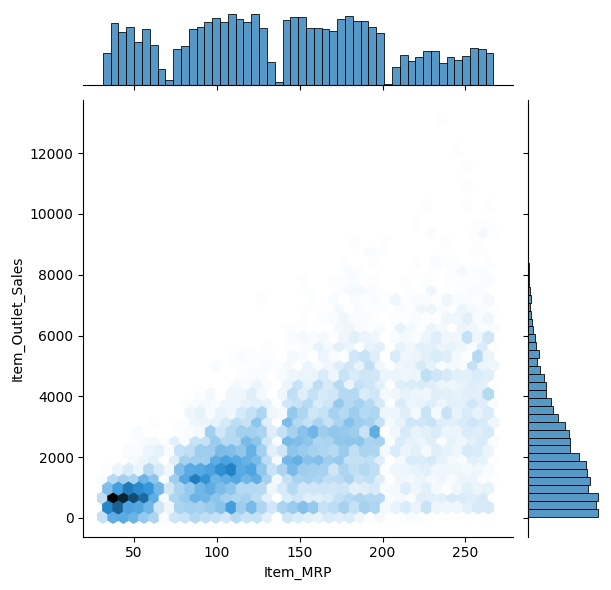

In [23]:
g=sns.jointplot(x="Item_MRP",y="Item_Outlet_Sales",data=train_df,kind="hex",marginal_kws=dict(bins=50, fill=True))

plt.show()

## Feature Engineering -2


In [24]:
train_df.drop(["Item_Weight","Item_Visibility","Outlet_Establishment_Year"],axis=1,inplace=True)



---


Item_Identifier,Outlet_Identifier, Item_Type and Outlet_Type doesnt have any ordinal relationship, whereas Item_Fat_Content,Outlet_Size and Outlet_Location_Type are ordinal columns.

---



In [25]:
train_df.groupby("Item_Identifier").size()

Item_Identifier
DRA12    6
DRA24    7
DRA59    8
DRB01    2
DRB13    5
        ..
NCZ30    7
NCZ41    5
NCZ42    5
NCZ53    5
NCZ54    7
Length: 1559, dtype: int64



---


As this feature has a high number of unique values with almost the same frequency, we can't apply one-hot encoding or frequency encoding. It's better to apply binary encoding.


---



In [26]:

import category_encoders as ce
te = ce.BinaryEncoder(cols=['Item_Identifier'])
temp = te.fit_transform(train_df)
train_df[temp.columns] = temp

In [27]:
train_df.drop("Item_Identifier",axis=1,inplace=True)

In [28]:
train_df.groupby("Outlet_Identifier").size()

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    413
OUT027    746
OUT035    930
OUT045    929
OUT046    930
OUT049    930
dtype: int64

In [29]:
train_df.groupby("Item_Type").size()

Item_Type
Baking Goods              625
Breads                    242
Breakfast                 104
Canned                    627
Dairy                     661
Frozen Foods              826
Fruits and Vegetables    1184
Hard Drinks               210
Health and Hygiene        496
Household                 873
Meat                      409
Others                    162
Seafood                    63
Snack Foods              1160
Soft Drinks               434
Starchy Foods             143
dtype: int64

In [30]:
train_df.groupby("Outlet_Type").size()

Outlet_Type
Grocery Store         968
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     746
dtype: int64

---
As the other three columns have less number of columns we can apply one hot encoding and drop 1 column from each.

---



In [31]:
z = train_df.loc[:, ["Outlet_Identifier", "Item_Type", "Outlet_Type"]]
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), ['Outlet_Identifier', 'Item_Type', 'Outlet_Type'])  # Apply OneHotEncoder and drop the first category
    ],
    remainder='passthrough' )
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])
pipeline.fit(z)
X_train_encoded = pipeline.transform(z)
encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
encoded_feature_names = encoder.get_feature_names_out()
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)


In [32]:
X_train_encoded_df

,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Type_Breads,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8214,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8215,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8216,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8217,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [33]:
X = train_df[['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']].copy()


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']),  # Apply OneHotEncoder to categorical columns

    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])
pipeline.fit(X)
transformed_X = pipeline.transform(X)
transformed_df = pd.DataFrame(transformed_X, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())

In [34]:
transformed_df

,cat__Item_Fat_Content_Low Fat,cat__Item_Fat_Content_Regular,cat__Outlet_Size_High,cat__Outlet_Size_Medium,cat__Outlet_Size_Small,cat__Outlet_Location_Type_Tier 1,cat__Outlet_Location_Type_Tier 2,cat__Outlet_Location_Type_Tier 3
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
8214,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8215,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8216,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8217,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [35]:
train_df.drop(["Outlet_Identifier", "Item_Type", "Outlet_Type",'Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type'],axis=1,inplace=True)

In [36]:
train_df[X_train_encoded_df.columns]=X_train_encoded_df
train_df[transformed_df.columns]=transformed_df

In [37]:
train_df

,Item_MRP,Item_Outlet_Sales,Item_Identifier_0,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4,Item_Identifier_5,Item_Identifier_6,Item_Identifier_7,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,cat__Item_Fat_Content_Low Fat,cat__Item_Fat_Content_Regular,cat__Outlet_Size_High,cat__Outlet_Size_Medium,cat__Outlet_Size_Small,cat__Outlet_Location_Type_Tier 1,cat__Outlet_Location_Type_Tier 2,cat__Outlet_Location_Type_Tier 3
0,249.8092,3735.1380,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,48.2692,443.4228,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,141.6180,2097.2700,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,182.0950,732.3800,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,53.8614,994.7052,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8214,214.5218,2778.3834,0,0,1,0,1,1,0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8215,108.1570,549.2850,1,0,1,1,1,1,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8216,85.1224,1193.1136,0,0,1,0,1,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8217,103.1332,1845.5976,0,1,1,1,0,0,0,1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [38]:
cols_to_convert = train_df.columns[train_df.columns.get_loc("Outlet_Identifier_OUT013"):]
train_df[cols_to_convert] = train_df[cols_to_convert].round().astype("int64")

In [39]:
train_df

,Item_MRP,Item_Outlet_Sales,Item_Identifier_0,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4,Item_Identifier_5,Item_Identifier_6,Item_Identifier_7,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,cat__Item_Fat_Content_Low Fat,cat__Item_Fat_Content_Regular,cat__Outlet_Size_High,cat__Outlet_Size_Medium,cat__Outlet_Size_Small,cat__Outlet_Location_Type_Tier 1,cat__Outlet_Location_Type_Tier 2,cat__Outlet_Location_Type_Tier 3
0,249.8092,3735.1380,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,48.2692,443.4228,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
2,141.6180,2097.2700,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,182.0950,732.3800,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,53.8614,994.7052,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8214,214.5218,2778.3834,0,0,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
8215,108.1570,549.2850,1,0,1,1,1,1,1,1,...,0,0,0,1,0,1,0,0,1,0
8216,85.1224,1193.1136,0,0,1,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
8217,103.1332,1845.5976,0,1,1,1,0,0,0,1,...,1,0,0,1,0,1,0,0,0,1


In [40]:
Y_train=train_df.loc[:,"Item_Outlet_Sales"]
train_df=train_df.drop("Item_Outlet_Sales",axis=1)

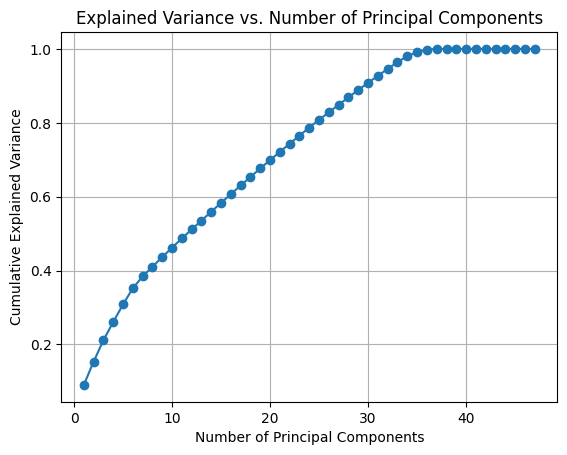

In [41]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()

for i in train_df.columns:
    if train_df[i].dtype in ['float64', 'int64']:
        train_df[i] = scaler1.fit_transform(train_df[i].values.reshape(-1, 1))
Y_train = scaler2.fit_transform(Y_train.values.reshape(-1, 1))
pca = PCA(n_components=47)
X_pca = pca.fit_transform(train_df)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

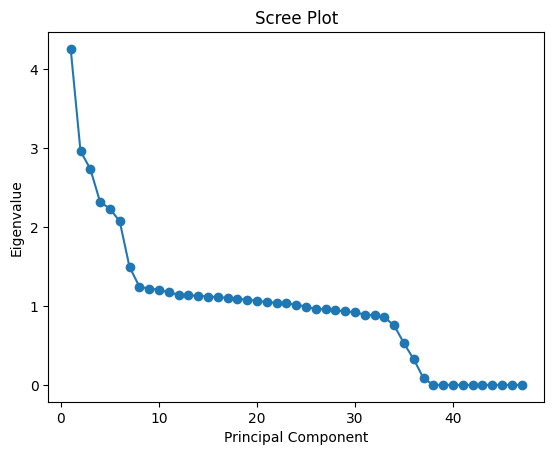

In [42]:
eigenvalues = pca.explained_variance_
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()



---



---

Ideal value of n_components is 36

---



---



In [43]:
pca=PCA(n_components=36)
x=pca.fit_transform(train_df)
df=pd.DataFrame(x)
df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-0.772917,-0.150562,-1.188657,-0.760280,0.189288,3.072584,-0.285047,-0.882424,0.279582,-0.544224,...,-1.156068,-0.040850,-0.046646,-1.763018,-1.221913,-0.946401,0.355653,1.013430,-0.962493,-0.103860
1,3.462971,-0.021200,-1.087924,0.944258,-3.059117,-0.671888,0.166728,1.466675,0.480926,0.568189,...,-0.582221,0.258690,0.788067,-0.659310,0.060088,-1.097409,-0.158814,-1.420383,-1.117443,-0.335461
2,-0.714508,-0.167338,-1.289674,-0.294118,0.178081,3.013532,0.761901,0.280255,0.483559,1.187279,...,-0.376131,-1.546998,1.604328,0.210006,-1.206729,-1.504681,-0.681315,1.740029,-0.996401,-0.141906
3,1.676714,-0.021466,-0.208317,2.180289,-0.164064,0.049984,0.141970,-0.422217,-0.739464,1.419506,...,-1.381579,-0.999409,0.052476,-1.527253,0.025824,-0.140658,0.770707,-0.302814,-1.182279,2.048171
4,0.562882,2.883913,3.651016,-1.564637,0.142788,0.685476,0.276130,0.246000,-0.040938,0.939650,...,-1.261914,0.104856,-1.382853,0.438809,0.161895,0.232896,0.337114,-0.610364,-1.255685,-0.213930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8214,0.565618,2.882263,3.550809,-0.681535,0.068944,0.661634,-0.435199,-1.383063,1.557055,-2.645084,...,-0.411642,-1.023550,0.637753,-0.056640,0.845091,0.233948,-0.403485,0.756241,-0.859382,-0.133760
8215,-0.666741,-2.494749,0.899036,1.592237,-0.305763,0.289588,1.494063,-0.609491,-0.027213,0.667620,...,1.230418,1.246496,-0.495965,1.351443,0.550846,0.615339,-0.522827,-0.863887,0.589773,-0.142170
8216,-2.387955,-0.411398,0.631183,-1.830852,0.033059,-2.581693,-0.264739,-0.701411,-0.518529,-0.095655,...,0.362395,-0.066679,0.848072,1.115971,-0.428255,-0.973432,-1.527221,-1.132225,-1.169947,0.015401
8217,3.463347,-0.027540,-1.134246,1.724475,-3.016273,-0.647816,-1.840491,0.411006,0.408086,-1.832048,...,-0.546305,0.433482,0.369030,-0.424229,0.814224,1.784562,1.326321,-0.223035,0.258734,-0.360376


## ANN Model

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,Y_train,test_size=0.2,random_state= 1)

Epoch 1/200
106/106 [==============================] - 5s 17ms/step - loss: 1.4542 - mean_squared_error: 1.3957 - val_loss: 1.1459 - val_mean_squared_error: 1.0880
Epoch 2/200
106/106 [==============================] - 1s 10ms/step - loss: 1.0809 - mean_squared_error: 1.0231 - val_loss: 1.1234 - val_mean_squared_error: 1.0657
Epoch 3/200
106/106 [==============================] - 1s 10ms/step - loss: 1.0366 - mean_squared_error: 0.9790 - val_loss: 1.1076 - val_mean_squared_error: 1.0502
Epoch 4/200
106/106 [==============================] - 1s 8ms/step - loss: 1.0148 - mean_squared_error: 0.9574 - val_loss: 1.0895 - val_mean_squared_error: 1.0323
Epoch 5/200
106/106 [==============================] - 1s 11ms/step - loss: 0.9866 - mean_squared_error: 0.9295 - val_loss: 1.0647 - val_mean_squared_error: 1.0076
Epoch 6/200
106/106 [==============================] - 1s 6ms/step - loss: 0.9798 - mean_squared_error: 0.9228 - val_loss: 1.0450 - val_mean_squared_error: 0.9881
Epoch 7/200
106/10

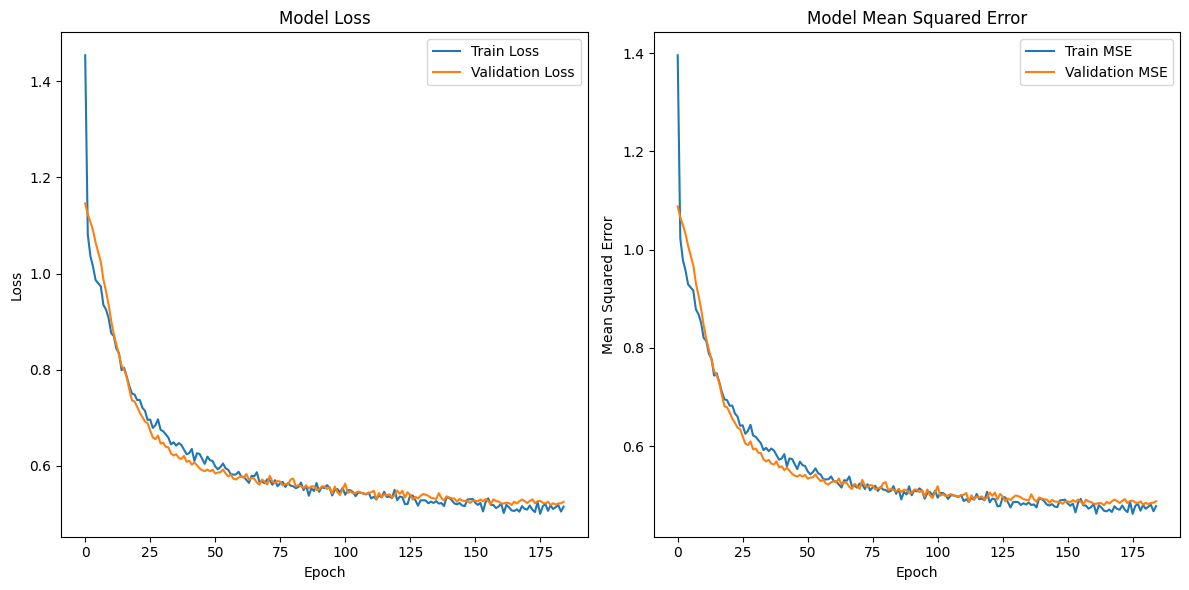

In [45]:
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer=SGD(learning_rate=0.005), loss='mean_squared_error', metrics=['mean_squared_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=200, batch_size=50, verbose=1, validation_split=0.2, callbacks=[early_stopping])

y_pred = model.predict(x_test).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_squared_error'], label='Train MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.tight_layout()
plt.show()

# Test Data

In [46]:
test_df=pd.read_csv("/content/Test (2).csv")
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


## Feature Engineering

In [47]:
for i in test_df.columns[test_df.dtypes=="object"]:
  test_df[i]=test_df[i].astype("category")

In [48]:
test_df["Outlet_Size"].fillna(test_df["Outlet_Size"].mode()[0],inplace=True)

In [49]:
def fill_missing_weight(df, grp):
  def g(group):
    return group.fillna(group.bfill())
  return df.groupby('Item_Identifier')['Item_Weight'].transform(g)
test_df["Item_Weight"] = fill_missing_weight(test_df.copy(), grp)

In [50]:
test_df.dropna(inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [51]:
replacements = {
    "LF": "Low Fat",
    "low fat": "Low Fat",
    "reg": "Regular"
}

test_df["Item_Fat_Content"].replace(replacements, inplace=True)

In [52]:
test_df_1=test_df.copy()

In [53]:
test_df.drop(["Outlet_Establishment_Year"],axis=1,inplace=True)

In [54]:
te = ce.BinaryEncoder(cols=['Item_Identifier'])
temp= te.fit_transform(test_df["Item_Identifier"])
test_df[temp.columns]=temp

In [55]:
test_df.drop("Item_Identifier",axis=1,inplace=True)

In [56]:
z = test_df.loc[:, ["Outlet_Identifier", "Item_Type", "Outlet_Type"]]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), ['Outlet_Identifier', 'Item_Type', 'Outlet_Type'])
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

pipeline.fit(z)

X_train_encoded = pipeline.transform(z)

encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
encoded_feature_names = encoder.get_feature_names_out()
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)


In [57]:
X = test_df[['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Item_Weight', 'Item_Visibility']].copy()


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

pipeline.fit(X)


transformed_X = pipeline.transform(X)


transformed_df = pd.DataFrame(transformed_X, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())

In [58]:
test_df.drop(["Outlet_Identifier", "Item_Type", "Outlet_Type",'Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type'],axis=1,inplace=True)

In [59]:
test_df[X_train_encoded_df.columns]=X_train_encoded_df
test_df[transformed_df.columns]=transformed_df

In [60]:
test_df

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier_0,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4,Item_Identifier_5,Item_Identifier_6,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,cat__Item_Fat_Content_Low Fat,cat__Item_Fat_Content_Regular,cat__Outlet_Size_High,cat__Outlet_Size_Medium,cat__Outlet_Size_Small,cat__Outlet_Location_Type_Tier 1,cat__Outlet_Location_Type_Tier 2,cat__Outlet_Location_Type_Tier 3
0,20.750,0.007565,107.8622,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,8.300,0.038428,87.3198,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,14.600,0.099575,241.7538,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,7.315,0.015388,155.0340,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,13.600,0.118599,234.2300,0,0,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5400,10.500,0.013496,141.3154,1,0,0,1,1,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
5401,7.600,0.142991,169.1448,0,1,1,0,1,1,1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5402,10.000,0.073529,118.7440,1,0,1,0,1,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5403,15.300,0.000000,214.6218,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [61]:
cols_to_convert = test_df.columns[test_df.columns.get_loc("Outlet_Identifier_OUT013"):]
test_df[cols_to_convert] = test_df[cols_to_convert].round().astype("int64")

In [62]:
test_df

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier_0,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4,Item_Identifier_5,Item_Identifier_6,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,cat__Item_Fat_Content_Low Fat,cat__Item_Fat_Content_Regular,cat__Outlet_Size_High,cat__Outlet_Size_Medium,cat__Outlet_Size_Small,cat__Outlet_Location_Type_Tier 1,cat__Outlet_Location_Type_Tier 2,cat__Outlet_Location_Type_Tier 3
0,20.750,0.007565,107.8622,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,8.300,0.038428,87.3198,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,14.600,0.099575,241.7538,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,7.315,0.015388,155.0340,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,13.600,0.118599,234.2300,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5400,10.500,0.013496,141.3154,1,0,0,1,1,0,1,...,0,0,0,1,0,0,1,1,0,0
5401,7.600,0.142991,169.1448,0,1,1,0,1,1,1,...,1,0,0,1,0,1,0,0,0,1
5402,10.000,0.073529,118.7440,1,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5403,15.300,0.000000,214.6218,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [63]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


for i in test_df.columns:

  test_df[i] = scaler1.fit_transform(test_df[i].values.reshape(-1,1))

pca = PCA(n_components=36)
x=pca.fit_transform(test_df)



## Substitution Test Data Trained Model

In [64]:
x

array([[-0.75648147, -0.35831086, -1.24394893, ...,  1.88468175,
        -1.33982644,  1.19603556],
       [-0.61964012, -2.47346321,  1.15680983, ..., -0.13020069,
        -1.07842004,  0.08117266],
       [ 1.71512504, -0.10054286, -0.21659346, ...,  0.56572662,
         0.77758467, -1.31519813],
       ...,
       [-0.68314537, -2.41835162,  0.92656952, ..., -0.80491676,
         0.03755232, -1.25805476],
       [-0.698182  , -2.38397361,  1.21821139, ...,  1.34955784,
        -1.11670202,  0.62861848],
       [-0.70747958, -2.27172386,  1.16836914, ..., -0.17932623,
         0.74589274, -0.64653953]])

In [65]:
pred=model.predict(x)

169/169 [==============================] - 0s 1ms/step


## Predicted Values

In [66]:
test_df_1["sales"]=scaler2.inverse_transform(pred).astype("int64")

In [67]:
test_df_1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,942
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,1761
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,4733
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,1299
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,4567
...,...,...,...,...,...,...,...,...,...,...,...,...
5400,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,1391
5401,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,1397
5402,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,4497
5403,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,3124
